In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pjV8aQnSRCYfarKuWX1N")
project = rf.workspace("forest-fire-detection-nqtzt").project("forest-fire-detection-defus")
version = project.version(4)

# Download the dataset to a specific directory
dataset = version.download("yolov8", location="/content/drive/MyDrive/forest_fire_yolo")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 129.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/drive/MyDrive/forest_fire_yolo in yolov8:: 100%|██████████| 37244/37244 [04:47<00:00, 129.53it/s]


In [ ]:
!pip install ultralytics seaborn matplotlib

import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
dataset_path = '/content/drive/MyDrive/forest_fire_yolo'


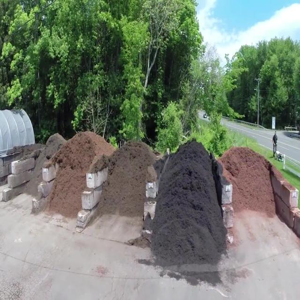

Class: Non Fire


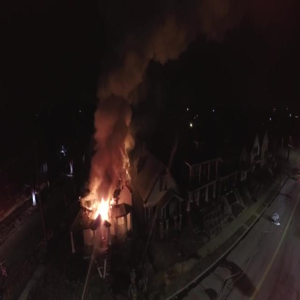

Class: Fire Flame


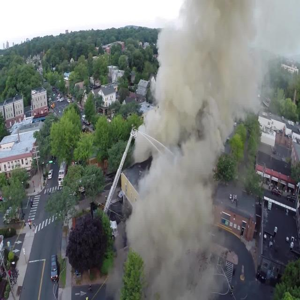

Class: Fire Smoke


In [ ]:
import yaml
from pathlib import Path
from PIL import Image as PILImage
from IPython.display import display

# Load class names
with open(f"{dataset_path}/data.yaml", "r") as f:
    data = yaml.safe_load(f)
names = data['names']
num_classes = len(names)

# Directories
train_images_dir = Path(f"{dataset_path}/train/images")
train_labels_dir = Path(f"{dataset_path}/train/labels")

# Indexes to check
indexes = [1, 50, 100, 150, 200]
seen_classes = set()

# Get sorted label files
label_files = sorted(train_labels_dir.glob("*.txt"))

# Iterate using predefined indexes
for idx in indexes:
    if idx >= len(label_files):
        continue  # skip if index is out of bounds

    label_file = label_files[idx]
    with open(label_file, "r") as f:
        class_ids = {int(line.split()[0]) for line in f if line.strip()}

    unseen = class_ids - seen_classes
    if unseen:
        class_id_to_show = list(unseen)[0]
        stem = label_file.stem
        img_path_jpg = train_images_dir / f"{stem}.jpg"
        img_path_png = train_images_dir / f"{stem}.png"
        img_path = img_path_jpg if img_path_jpg.exists() else img_path_png if img_path_png.exists() else None

        if img_path:
            display(PILImage.open(img_path).resize((300, 300)))
            print(f"Class: {names[class_id_to_show]}")
            seen_classes.add(class_id_to_show)

    if len(seen_classes) == num_classes:
        break


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # or yolov8s.pt / yolov8m.pt for larger models

results = model.train(
    data=f"{dataset_path}/data.yaml",
    epochs=25,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/YOLOv8_FireDetection",
    name="yolov8n_fire",
    save=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 118MB/s]


Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/forest_fire_yolo/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLOv8_FireDetection, name=yolov8n_fire, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 29.5MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 92.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.6±2.7 ms, read: 11.3±3.0 MB/s, size: 57.1 KB)


train: Scanning /content/drive/MyDrive/forest_fire_yolo/train/labels... 16779 images, 2727 backgrounds, 0 corrupt: 100%|██████████| 16779/16779 [05:36<00:00, 49.91it/s] 

train: /content/drive/MyDrive/forest_fire_yolo/train/images/00662_jpg.rf.13b5d711eb32c0b7e83ca70a9f86bb90.jpg: 5 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/00662_jpg.rf.4e4c7ab27f25338ee68896287ec03594.jpg: 5 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/04747_jpg.rf.4038e870c1bcc30fdb78f9b998a35c09.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/04747_jpg.rf.e160ecd648f66f54bf93b9a883187bac.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/04747_jpg.rf.f0c520fecaefe446213e55e347e0a597.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/07769_jpg.rf.8c41a062ba5cc8567c9c26d9eec93f87.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/forest_fire_yolo/train/images/07769_jpg.rf.b91b1804547cc15b2f0d1c7ef2f7d1f6.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/fore

train: New cache created: /content/drive/MyDrive/forest_fire_yolo/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8307, len(boxes) = 113503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.1±1.3 ms, read: 9.3±3.1 MB/s, size: 44.0 KB)


val: Scanning /content/drive/MyDrive/forest_fire_yolo/valid/labels... 918 images, 14 backgrounds, 0 corrupt: 100%|██████████| 918/918 [00:12<00:00, 74.59it/s] 


val: New cache created: /content/drive/MyDrive/forest_fire_yolo/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 665, len(boxes) = 2483. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.38G          2      2.849      2.055        164        640: 100%|██████████| 1049/1049 [06:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.40it/s]


                   all        918       2483       0.16       0.13     0.0754     0.0222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25       3.4G      1.934      2.703      2.031         79        640: 100%|██████████| 1049/1049 [06:10<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]


                   all        918       2483      0.185      0.139     0.0866     0.0307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       4.8G      1.913      2.675      2.014         76        640: 100%|██████████| 1049/1049 [06:10<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.69it/s]


                   all        918       2483      0.207      0.153      0.104     0.0417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.82G      1.882      2.644      1.992        151        640: 100%|██████████| 1049/1049 [06:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]


                   all        918       2483      0.204      0.161      0.108     0.0433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.84G      1.854      2.619      1.974        140        640: 100%|██████████| 1049/1049 [05:58<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]


                   all        918       2483      0.228      0.177      0.115     0.0434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.85G      1.845      2.596      1.965         33        640: 100%|██████████| 1049/1049 [05:55<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.65it/s]


                   all        918       2483       0.16      0.164       0.09     0.0273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.87G       1.82      2.577      1.947        207        640: 100%|██████████| 1049/1049 [05:56<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.63it/s]


                   all        918       2483      0.212      0.175      0.123     0.0505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.89G      1.799      2.556       1.94         86        640: 100%|██████████| 1049/1049 [05:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.62it/s]


                   all        918       2483       0.21      0.168      0.114     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       4.9G      1.792      2.537      1.932         92        640: 100%|██████████| 1049/1049 [05:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.65it/s]


                   all        918       2483      0.222      0.182      0.128     0.0518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.92G      1.785      2.526      1.926        139        640: 100%|██████████| 1049/1049 [05:54<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]


                   all        918       2483      0.235      0.194      0.145     0.0577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.94G      1.781      2.523       1.92        178        640: 100%|██████████| 1049/1049 [05:55<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.67it/s]


                   all        918       2483      0.234      0.197      0.143     0.0559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.96G      1.772      2.505      1.914         92        640: 100%|██████████| 1049/1049 [05:45<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]


                   all        918       2483      0.222      0.187      0.136      0.058

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.97G      1.761      2.493      1.908         79        640: 100%|██████████| 1049/1049 [05:50<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]


                   all        918       2483      0.215      0.199      0.132     0.0544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.99G       1.76      2.483      1.905         81        640: 100%|██████████| 1049/1049 [05:44<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]


                   all        918       2483      0.219      0.185      0.132     0.0526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.01G      1.748      2.476      1.897        108        640: 100%|██████████| 1049/1049 [05:50<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.78it/s]


                   all        918       2483      0.218      0.207       0.13     0.0521
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.03G      2.007      2.792      2.147        110        640: 100%|██████████| 1049/1049 [05:28<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.77it/s]


                   all        918       2483      0.239      0.188      0.153     0.0635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.04G      1.997      2.758       2.14        150        640: 100%|██████████| 1049/1049 [05:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.78it/s]


                   all        918       2483      0.242      0.205      0.149     0.0602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.06G      1.971      2.741      2.133        167        640: 100%|██████████| 1049/1049 [05:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.10it/s]


                   all        918       2483      0.246      0.213      0.158     0.0655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.08G      1.964      2.715       2.12         18        640: 100%|██████████| 1049/1049 [05:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.16it/s]


                   all        918       2483       0.24      0.204      0.156     0.0634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.09G      1.961      2.703       2.11        104        640: 100%|██████████| 1049/1049 [05:23<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.07it/s]


                   all        918       2483      0.233      0.207      0.149     0.0613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.11G      1.941      2.681      2.098         65        640: 100%|██████████| 1049/1049 [05:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.85it/s]


                   all        918       2483      0.246      0.205      0.159     0.0661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      1.932      2.671      2.091        107        640: 100%|██████████| 1049/1049 [05:22<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.83it/s]


                   all        918       2483      0.231      0.227       0.16     0.0657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.926      2.656      2.087         70        640: 100%|██████████| 1049/1049 [05:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.83it/s]


                   all        918       2483      0.244      0.221      0.166      0.068

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.912      2.636      2.073         37        640: 100%|██████████| 1049/1049 [05:22<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]


                   all        918       2483      0.257      0.216      0.163     0.0662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.18G      1.897      2.619      2.065         22        640: 100%|██████████| 1049/1049 [05:22<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.93it/s]


                   all        918       2483      0.254      0.216      0.163      0.067

25 epochs completed in 2.465 hours.
Optimizer stripped from /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/best.pt...
Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:13<00:00,  2.17it/s]


                   all        918       2483      0.242      0.224      0.166     0.0681
            Fire Flame        771       1458      0.283      0.381      0.268      0.113
            Fire Smoke        574        870       0.37      0.252      0.221     0.0875
              Non Fire         74        155     0.0734     0.0387    0.00993    0.00379
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire


Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 1.2±0.8 ms, read: 23.4±10.4 MB/s, size: 39.2 KB)


val: Scanning /content/drive/MyDrive/forest_fire_yolo/valid/labels.cache... 918 images, 14 backgrounds, 0 corrupt: 100%|██████████| 918/918 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 665, len(boxes) = 2483. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.61it/s]


                   all        918       2483      0.242      0.224      0.166      0.068
            Fire Flame        771       1458      0.282      0.381      0.268      0.113
            Fire Smoke        574        870      0.371      0.251      0.222     0.0875
              Non Fire         74        155     0.0731     0.0387    0.00993    0.00378
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire5


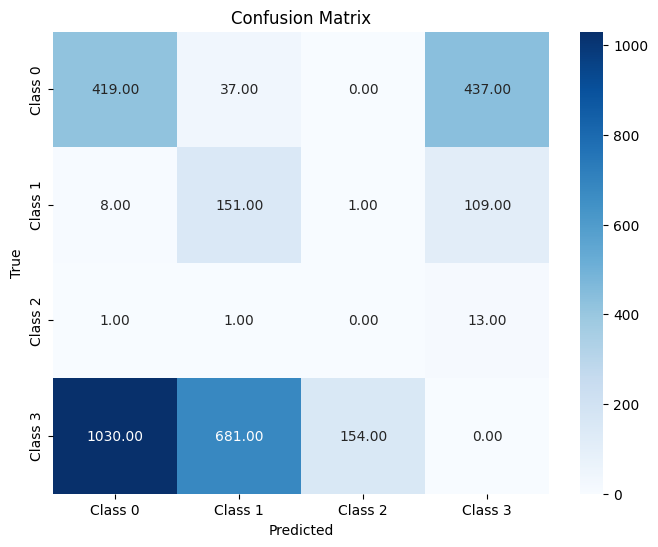

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Run validation on validation set
metrics = model.val()

# If classification report is available
if hasattr(metrics, "confusion_matrix"):
    cm = metrics.confusion_matrix.matrix
    # Get the number of classes from the shape of the confusion matrix
    num_classes_cm = cm.shape[0]
    # Create a list of class labels based on the confusion matrix shape
    labels = [f"Class {i}" for i in range(num_classes_cm)]
    # Create the DataFrame
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(8,6))
    # Change the format code to '.2f' to display floats with 2 decimal places
    sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

In [ ]:
best_model_path = "/content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/best.pt"
print("Model saved at:", best_model_path)


Model saved at: /content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/best.pt


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file dialog in Colab


Saving FIRE-15-_jpeg.rf.42e03811f342446d723fa724d9492af5.jpg to FIRE-15-_jpeg.rf.42e03811f342446d723fa724d9492af5 (2).jpg



image 1/1 /content/FIRE-15-_jpeg.rf.42e03811f342446d723fa724d9492af5 (2).jpg: 640x640 1 Fire Smoke, 1 Non Fire, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


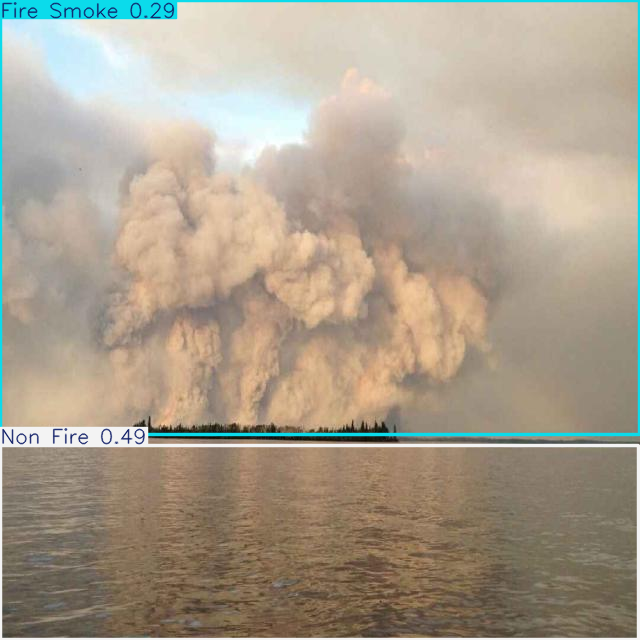

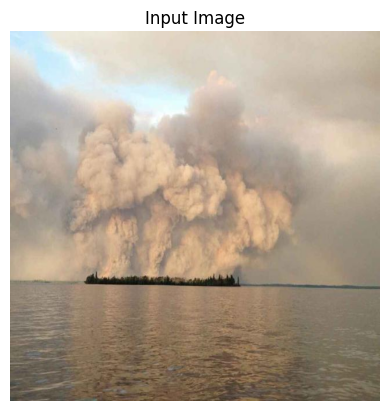

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the best trained model
model = YOLO("/content/drive/MyDrive/YOLOv8_FireDetection/yolov8n_fire/weights/best.pt")

# Get uploaded image path
image_path = list(uploaded.keys())[0]

# Predict
results = model.predict(image_path, conf=0.25)

# Show results
results[0].show()

# If you want to display with matplotlib
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()
